In [1]:
import torch
import timeit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_matrices(m):
    W = np.random.rand(90, m)
    X = np.random.rand(m, 110)
    return W, X

In [3]:
def plain_python_multiply(W, X):
    result = np.zeros((90, 110))
    for i in range(90):
        for j in range(110):
            for k in range(len(W[0])):
                result[i][j] += W[i][k] * X[k][j]
    return result

In [4]:
def transform_to_tensor(W, X):
    W_t = torch.tensor(W)
    X_t = torch.tensor(X)
    return W_t, X_t

In [5]:
def vectorized_multiply(W_t, X_t):
    return torch.matmul(W_t, X_t)

In [6]:
m_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plain_times = []
vectorized_times = []

for count, m in enumerate(m_values, 1):
    W, X = generate_matrices(m)
    W_t, X_t = transform_to_tensor(W, X)

    print(f'Iteration {count}: plain python mul')
    plain_time = %timeit -o plain_python_multiply(W, X)
    print()
    print(f'Iteration {count}: vectorized mul')
    vectorized_time = %timeit -o vectorized_multiply(W_t, X_t)
    print() 

    plain_times.append(plain_time)
    vectorized_times.append(vectorized_time)


Iteration 1: plain python mul
56.6 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Iteration 1: vectorized mul
10.3 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Iteration 2: plain python mul
111 ms ± 299 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Iteration 2: vectorized mul
12.5 µs ± 89.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Iteration 3: plain python mul
167 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Iteration 3: vectorized mul
15.3 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Iteration 4: plain python mul
220 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Iteration 4: vectorized mul
17.1 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Iteration 5: plain python mul
273 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Iteration 5: vectorized mul
19.5 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 10

In [7]:
speed_ratios = [plain_time.best / vectorized_time.best for plain_time, vectorized_time in zip(plain_times, vectorized_times)]


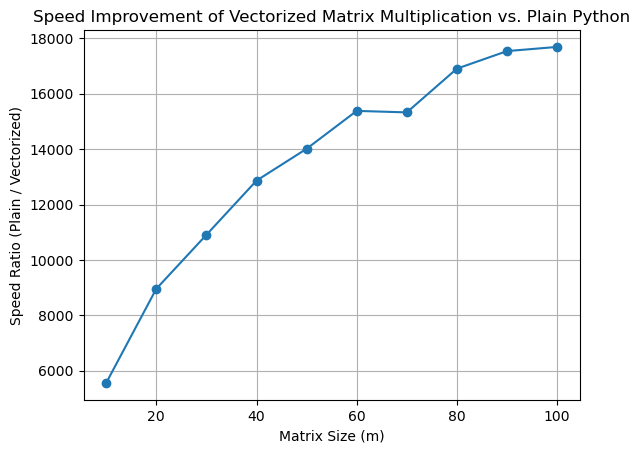

In [8]:
plt.plot(m_values, speed_ratios, marker='o')
plt.xlabel('Matrix Size (m)')
plt.ylabel('Speed Ratio (Plain / Vectorized)')
plt.title('Speed Improvement of Vectorized Matrix Multiplication vs. Plain Python')
plt.grid(True)
plt.show()